**Importing dataset from Kaggle**

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# download dataset
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:03<00:00, 264MB/s]
100% 715M/715M [00:03<00:00, 237MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
# for extracting .7z files
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.6 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
# importing required libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import random

In [11]:
filenames = os.listdir('/content/train')
type(filenames)

list

In [12]:
len(filenames)

50000

In [13]:
print(filenames[0:5])
print(filenames[-5:])

['39919.png', '14670.png', '20011.png', '49214.png', '25186.png']
['49695.png', '28799.png', '29641.png', '28455.png', '22271.png']


In [14]:
# labels
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [18]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [19]:
labels_df[labels_df['id'] == 3580]

,id,label
3579,3580,ship


In [20]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [22]:
# encoding the labels to numeric form

labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [23]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


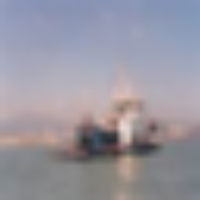

In [24]:
# displaying sample images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/3580.png')
img=cv2.resize(img, (200, 200))
cv2_imshow(img)

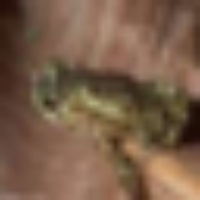

In [25]:
img = cv2.imread('/content/train/8035.png')
img=cv2.resize(img, (200, 200))
cv2_imshow(img)

In [26]:
labels_df[labels_df['id'] == 8035]

,id,label
8034,8035,frog


In [27]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [28]:
# list of image IDs
id_list = list(labels_df['id'])

In [29]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Preprocessing**

In [30]:
# converting images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [31]:
type(data)

list

In [32]:
len(data)

50000

In [33]:
type(data[0])

numpy.ndarray

In [34]:
data[0].shape

(32, 32, 3)

In [35]:
data[0]     # RGB values of each pixel

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [36]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [37]:
type(X)

numpy.ndarray

In [38]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
X_train_scaled[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

**Building the Convolutional Neural Network Model**

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
num_of_classes = 10

In [45]:
# create a Sequential model
model = keras.Sequential([
    # 1st convolution block
    keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 2nd convolution block
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 3rd convolution block
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 4th convolution block
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 5th convolution block
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # dropout layer
    keras.layers.Dropout(0.5),
    # flatten layer
    keras.layers.Flatten(),
    # dense layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0

In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# train the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 [==============================] - 58s 35ms/step - loss: 1.8891 - accuracy: 0.2916 - val_loss: 1.6777 - val_accuracy: 0.3787
Epoch 2/20
1125/1125 [==============================] - 39s 35ms/step - loss: 1.3931 - accuracy: 0.4847 - val_loss: 2.1559 - val_accuracy: 0.3575
Epoch 3/20
1125/1125 [==============================] - 40s 35ms/step - loss: 1.1404 - accuracy: 0.5998 - val_loss: 1.0685 - val_accuracy: 0.6400
Epoch 4/20
1125/1125 [==============================] - 40s 36ms/step - loss: 0.9922 - accuracy: 0.6556 - val_loss: 0.9644 - val_accuracy: 0.6678
Epoch 5/20
1125/1125 [==============================] - 40s 36ms/step - loss: 0.8914 - accuracy: 0.6969 - val_loss: 1.0713 - val_accuracy: 0.6325
Epoch 6/20
1125/1125 [==============================] - 40s 36ms/step - loss: 0.8140 - accuracy: 0.7271 - val_loss: 0.9198 - val_accuracy: 0.7035
Epoch 7/20
1125/1125 [==============================] - 40s 36ms/step - loss: 0.7439 - accuracy: 0.7523 - val_loss: 0.7909 -

In [48]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 0.5211 - accuracy: 0.8486
Test Accuracy = 0.8485999703407288


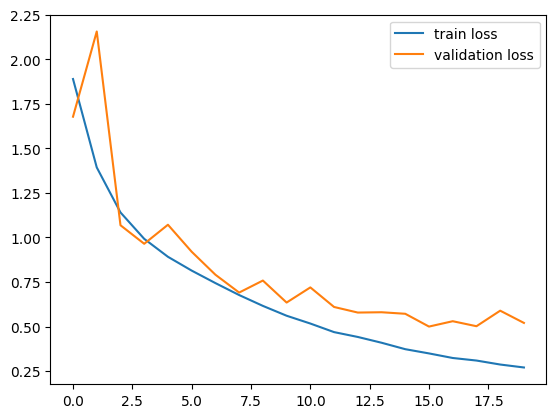

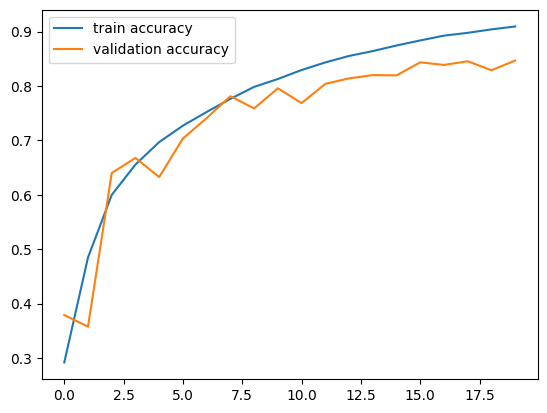

In [50]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**ResNet 50**

In [51]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [55]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [60]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [64]:
num_of_classes = 10

model1 = models.Sequential()
model1.add(layers.UpSampling2D((2,2)))
model1.add(layers.UpSampling2D((2,2)))
model1.add(layers.UpSampling2D((2,2)))
model1.add(convolutional_base)
model1.add(layers.Flatten())
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(num_of_classes, activation='softmax'))

In [65]:
model1.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [66]:
history = model1.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 466s 393ms/step - loss: 2.1881 - acc: 0.2104 - val_loss: 1.7953 - val_acc: 0.3413
Epoch 2/10
1125/1125 [==============================] - 461s 410ms/step - loss: 1.5309 - acc: 0.4380 - val_loss: 1.7497 - val_acc: 0.4403
Epoch 3/10
1125/1125 [==============================] - 454s 404ms/step - loss: 1.2849 - acc: 0.5516 - val_loss: 1.1039 - val_acc: 0.6127
Epoch 4/10
1125/1125 [==============================] - 460s 409ms/step - loss: 1.1310 - acc: 0.6134 - val_loss: 1.3391 - val_acc: 0.5440
Epoch 5/10
1125/1125 [==============================] - 461s 410ms/step - loss: 1.0297 - acc: 0.6543 - val_loss: 0.9417 - val_acc: 0.6690
Epoch 6/10
1125/1125 [==============================] - 463s 411ms/step - loss: 0.9287 - acc: 0.6905 - val_loss: 0.8715 - val_acc: 0.7045
Epoch 7/10
1125/1125 [==============================] - 463s 411ms/step - loss: 0.8528 - acc: 0.7161 - val_loss: 1.1966 - val_acc: 0.6198
Epoch 8/10
1125/1125 [============

In [67]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.5211 - accuracy: 0.8486
Test Accuracy = 0.8485999703407288


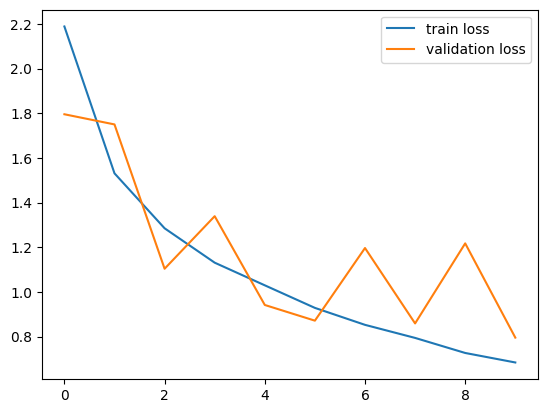

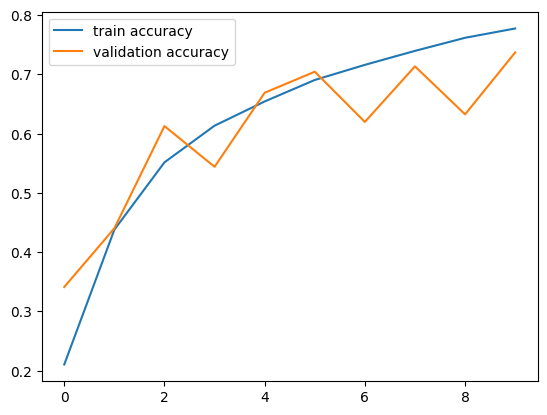

In [68]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()